<a href="https://colab.research.google.com/github/ameympatil/MIT-ML/blob/main/Keras_Practical_using_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Functional API

In [255]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow import keras
from keras.layers import Input, Dense, Dropout

In [256]:
df = pd.read_csv('/content/ionosphere.data')
print(df.shape)

(350, 35)


In [257]:
lis = list(range(0,35))

In [258]:
df.columns = lis

In [259]:
df = df.drop(columns=[1],axis=1)

In [260]:
df.head()

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [261]:
df[0].unique()

array([1, 0])

In [262]:
df[34].replace(['b', 'g'],[0,1],inplace=True)

In [263]:
df.head()

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0


In [264]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(280, 33)

In [265]:
# Create the input layer
input_layer = Input(shape=(33, ))

# Create the other hidden layers and the output layer
hidden_1 = Dense(128, activation='relu')(input_layer)
hidden_2 = Dense(64, activation='relu')(hidden_1)
hidden_3 = Dense(32, activation='relu')(hidden_2)
output = Dense(1, activation='sigmoid')(hidden_3)

In [266]:
model = Model(inputs=input_layer, outputs=output)

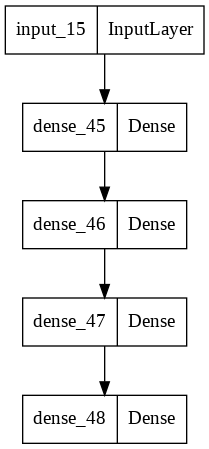

In [267]:
from keras.utils.vis_utils import plot_model

plot_model(model)

In [268]:
model.compile(optimizer='adam',loss = keras.losses.binary_crossentropy,metrics='accuracy')

In [269]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5975 - accuracy: 0.6643
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4755 - accuracy: 0.8000
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8893
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.9321
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9357
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1710 - accuracy: 0.9429
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9714
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9643
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0981 - accuracy: 0.9750
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9821
Epoch 11/100
9/9 [===========

In [270]:
model.evaluate(X_test,y_test,verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 0.1438 - accuracy: 0.9429


[0.14379628002643585, 0.9428571462631226]

In [271]:
loss,accuracy = model.evaluate(X_test,y_test,verbose=1)
print('Model Loss: %.4f, Accuracy:%.2f' %((loss),(accuracy*100)))

3/3 [==============================] - 0s 4ms/step - loss: 0.1438 - accuracy: 0.9429
Model Loss: 0.1438, Accuracy:94.29
